Part A - Store the hybrid algo in a fuction

In [ ]:
# Insertion Sort function
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

# Merge function for Merge Sort
def merge(arr, left, mid, right):
    n1 = mid - left + 1
    n2 = right - mid

    # Create temporary arrays
    L = arr[left:left + n1]
    R = arr[mid + 1:mid + 1 + n2]

    i = j = 0
    k = left

    while i < n1 and j < n2:
        if L[i] <= R[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1

    while i < n1:
        arr[k] = L[i]
        i += 1
        k += 1

    while j < n2:
        arr[k] = R[j]
        j += 1
        k += 1

# Hybrid Merge Sort (Merge Sort + Insertion Sort)
def hybrid_sort(arr, left, right, S):
    if right - left + 1 <= S:
        insertion_sort(arr[left:right + 1])
    else:
        if left < right:
            mid = (left + right) // 2
            hybrid_sort(arr, left, mid, S)
            hybrid_sort(arr, mid + 1, right, S)
            merge(arr, left, mid, right)

# Hybrid sort wrapper function
def hybrid_sort_main(arr, S):
    hybrid_sort(arr, 0, len(arr) - 1, S)



Alternate Part B - stores the arrays in varibles to use for part c

In [ ]:
import random

# Generating 5 different arrays from size 1,000 to 10 million
array_1k = [random.randint(1, 1000000) for _ in range(1000)]
array_10k = [random.randint(1, 1000000) for _ in range(10000)]
array_100k = [random.randint(1, 1000000) for _ in range(100000)]
array_1mil = [random.randint(1, 1000000) for _ in range(1000000)]
array_10mil = [random.randint(1, 10000000) for _ in range(10000000)]

# Storing the arrays in variables for future use in Part C
arrays = {
    "1k": array_1k,
    "10k": array_10k,
    "100k": array_100k,
    "1mil": array_1mil,
    "10mil": array_10mil
}

# Printing only the first 10 elements of each array
print("First 10 elements of array_1k:", array_1k[:10])
print("First 10 elements of array_10k:", array_10k[:10])
print("First 10 elements of array_100k:", array_100k[:10])
print("First 10 elements of array_1mil:", array_1mil[:10])
print("First 10 elements of array_10mil:", array_10mil[:10])



First 10 elements of array_1k: [67795, 596550, 196031, 870408, 523954, 841669, 822250, 982438, 101061, 60108]
First 10 elements of array_10k: [284721, 908903, 522113, 732119, 611326, 895416, 691451, 310979, 153009, 721765]
First 10 elements of array_100k: [176895, 770000, 954467, 373652, 803886, 207520, 402680, 315168, 745633, 388312]
First 10 elements of array_1mil: [724034, 357147, 455619, 938340, 860784, 423102, 835398, 422593, 78291, 776618]
First 10 elements of array_10mil: [6031772, 8488213, 7139975, 6125877, 3179182, 9384012, 3115193, 7681263, 1061636, 1362278]


Ci - key comp  + runtime + theory comp graph

Array size 1k, key comparisons: 8014, run time: 0.0026 seconds
Array size 10k, key comparisons: 114062, run time: 0.0397 seconds
Array size 100k, key comparisons: 1446297, run time: 0.5233 seconds
Array size 1mil, key comparisons: 17857491, run time: 7.9021 seconds
Array size 10mil, key comparisons: 213509393, run time: 92.2153 seconds


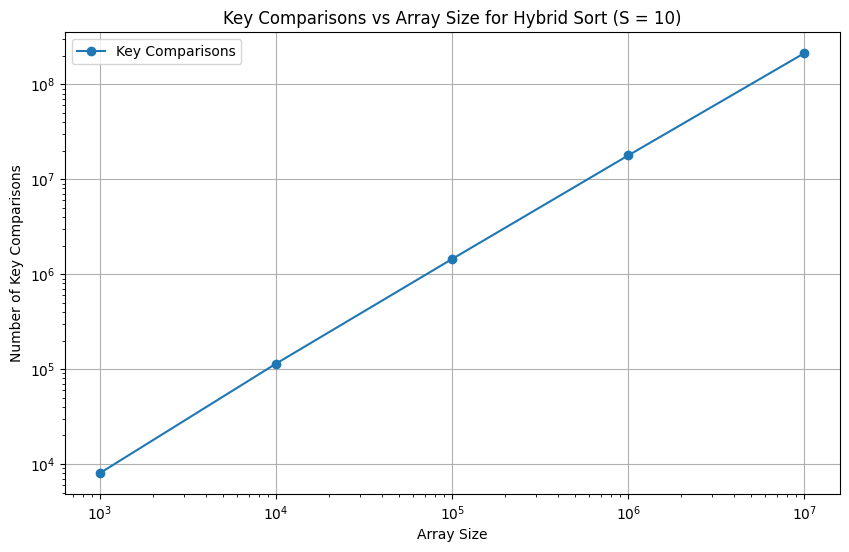

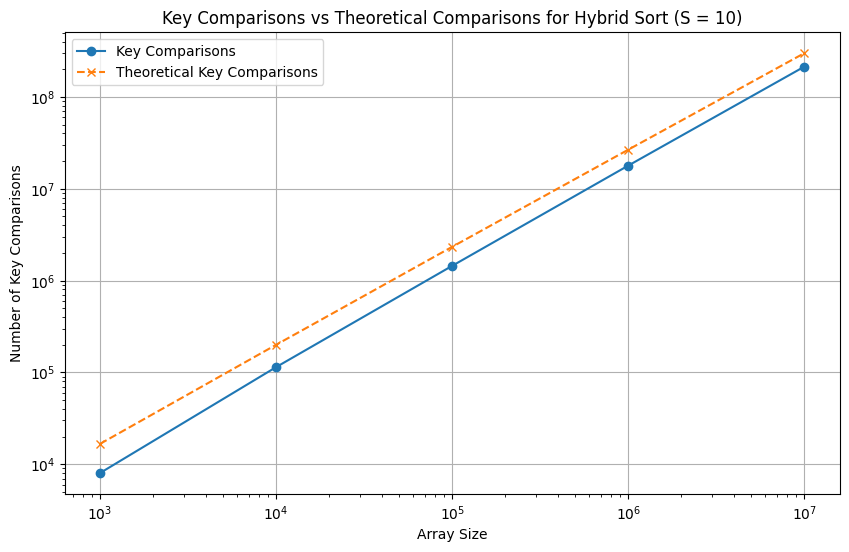

In [ ]:
import matplotlib.pyplot as plt
import time
import math

# Global counter for key comparisons
key_comparisons = 0

# Modified Insertion Sort function to track key comparisons
def insertion_sort(arr):
    global key_comparisons
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
            key_comparisons += 1  # Increment comparisons
        arr[j + 1] = key

# Modified Merge function to track key comparisons
def merge(arr, left, mid, right):
    global key_comparisons
    n1 = mid - left + 1
    n2 = right - mid

    L = arr[left:left + n1]
    R = arr[mid + 1:mid + 1 + n2]

    i = j = 0
    k = left

    while i < n1 and j < n2:
        key_comparisons += 1  # Increment comparisons
        if L[i] <= R[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1

    while i < n1:
        arr[k] = L[i]
        i += 1
        k += 1

    while j < n2:
        arr[k] = R[j]
        j += 1
        k += 1

# Hybrid Merge Sort with key comparisons
def hybrid_sort(arr, left, right, S):
    if right - left + 1 <= S:
        insertion_sort(arr[left:right + 1])
    else:
        if left < right:
            mid = (left + right) // 2
            hybrid_sort(arr, left, mid, S)
            hybrid_sort(arr, mid + 1, right, S)
            merge(arr, left, mid, right)

# Hybrid sort wrapper function
def hybrid_sort_main(arr, S):
    global key_comparisons
    key_comparisons = 0  # Reset comparisons count
    start_time = time.time()  # Start time
    hybrid_sort(arr, 0, len(arr) - 1, S)
    end_time = time.time()  # End time
    run_time = end_time - start_time
    return key_comparisons, run_time

# Theoretical time complexity function
def theoretical_complexity(n, S):
    return (n * math.log2(n/S)) + (S * n)

# Part C: Run hybrid sorting on different arrays and collect key comparisons and runtime
S = 10  # Threshold for switching to insertion sort
comparisons_results = {}
runtime_results = {}
theoretical_results = {}

# Use the arrays generated in Part B
for size, array in arrays.items():
    array_copy = array.copy()  # Make sure to sort a copy to avoid sorting the original array
    comparisons, run_time = hybrid_sort_main(array_copy, S)
    comparisons_results[size] = comparisons
    runtime_results[size] = run_time
    theoretical_results[size] = theoretical_complexity(len(array_copy), S)
    print(f"Array size {size}, key comparisons: {comparisons}")

# Plotting key comparisons results
sizes = [1000, 10000, 100000, 1000000, 10000000]
comparisons = [comparisons_results['1k'], comparisons_results['10k'], comparisons_results['100k'],
               comparisons_results['1mil'], comparisons_results['10mil']]

plt.figure(figsize=(10, 6))
plt.plot(sizes, comparisons, marker='o', label="Key Comparisons")
plt.xlabel('Array Size')
plt.ylabel('Number of Key Comparisons')
plt.title('Key Comparisons vs Array Size for Hybrid Sort (S = 10)')
plt.xscale('log')  # Log scale for better visibility
plt.yscale('log')  # Log scale for better visibility
plt.grid(True)
plt.legend()
plt.show()

# Plotting key comparisons results along with theoretical complexity
comparisons = [comparisons_results['1k'], comparisons_results['10k'], comparisons_results['100k'],
               comparisons_results['1mil'], comparisons_results['10mil']]
theoretical_times = [theoretical_results['1k'], theoretical_results['10k'], theoretical_results['100k'],
                     theoretical_results['1mil'], theoretical_results['10mil']]

plt.figure(figsize=(10, 6))
plt.plot(sizes, comparisons, marker='o', label="Key Comparisons")
plt.plot(sizes, theoretical_times, marker='x', label="Theoretical Key Comparisons", linestyle='--')
plt.xlabel('Array Size')
plt.ylabel('Number of Key Comparisons')
plt.title('Key Comparisons vs Theoretical Comparisons for Hybrid Sort (S = 10)')
plt.xscale('log')  # Log scale for better visibility
plt.yscale('log')  # Log scale for better visibility
plt.grid(True)
plt.legend()
plt.show()



part cii - key comp + runtime + theory for diff s value vs 1mil

S = 5, key comparisons: 7876, run time: 0.0057 seconds
Theoratical key comparisons: {5: 12643.856189774724}
S = 10, key comparisons: 8014, run time: 0.0034 seconds
Theoratical key comparisons: {5: 12643.856189774724, 10: 16643.856189774724}
S = 20, key comparisons: 9057, run time: 0.0028 seconds
Theoratical key comparisons: {5: 12643.856189774724, 10: 16643.856189774724, 20: 25643.856189774724}
S = 30, key comparisons: 9057, run time: 0.0027 seconds
Theoratical key comparisons: {5: 12643.856189774724, 10: 16643.856189774724, 20: 25643.856189774724, 30: 35058.89368905357}
S = 40, key comparisons: 11954, run time: 0.0033 seconds
Theoratical key comparisons: {5: 12643.856189774724, 10: 16643.856189774724, 20: 25643.856189774724, 30: 35058.89368905357, 40: 44643.85618977473}
S = 50, key comparisons: 11954, run time: 0.0032 seconds
Theoratical key comparisons: {5: 12643.856189774724, 10: 16643.856189774724, 20: 25643.856189774724, 30: 35058.89368905357, 40: 44643.85618977473, 50: 54321.9280

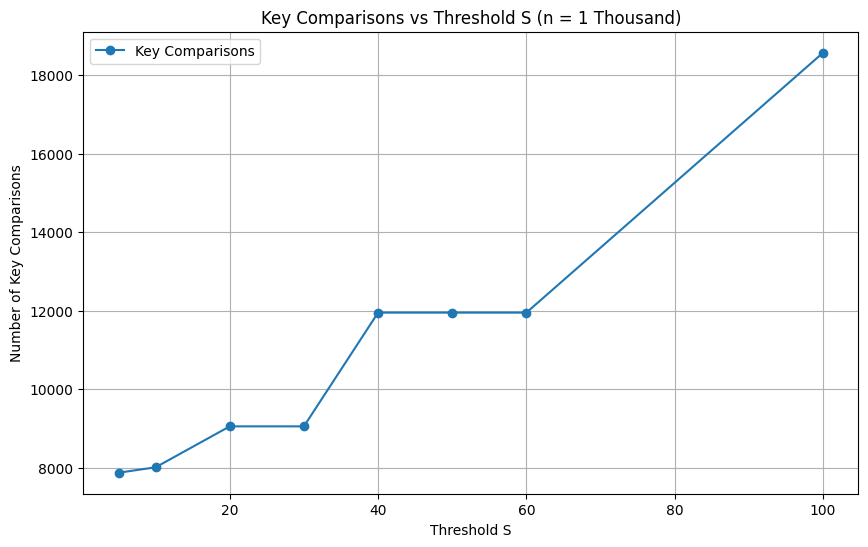

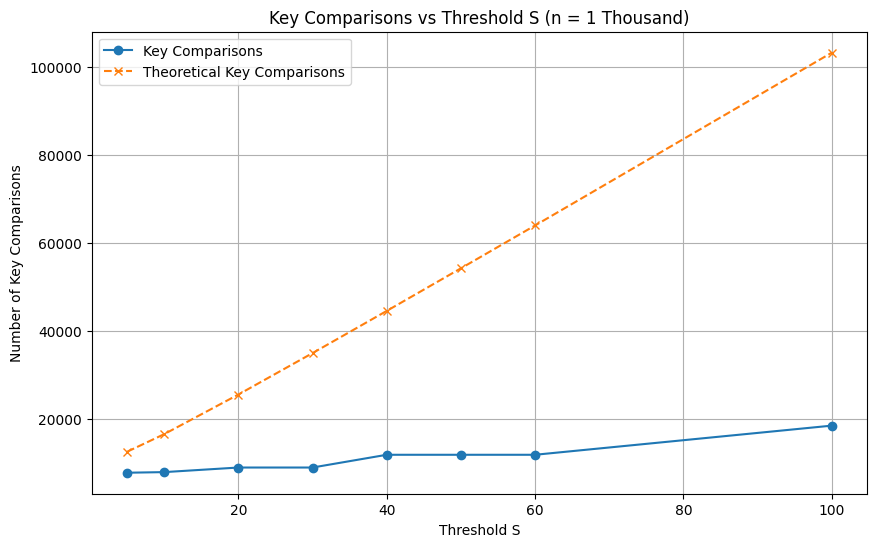

In [ ]:
import matplotlib.pyplot as plt
import time
import math

# Fix the input size to 1 million elements
fixed_array_size = arrays['1k']

# List of S values to test
S_values = [5, 10, 20, 30, 40, 50, 60, 100]

# Dictionary to store comparisons and runtimes for different values of S
comparisons_for_S = {}
runtime_for_S = {}
theoretical_for_S = {}

# Theoretical time complexity function
def theoretical_complexity(n, S):
    return (n * math.log2(n / S)) + (S * n)

# Run hybrid sorting for different values of S and record key comparisons and runtime
for S in S_values:
    array_copy = fixed_array_size.copy()  # Ensure we sort a copy of the array
    comparisons, run_time = hybrid_sort_main(array_copy, S)  # Sort and track time
    comparisons_for_S[S] = comparisons
    runtime_for_S[S] = run_time
    theoretical_for_S[S] = theoretical_complexity(len(fixed_array_size), S)
    print(f"S = {S}, key comparisons: {comparisons}, run time: {run_time:.4f} seconds")
    print(f"Theoratical key comparisons: {theoretical_for_S}")

# Plotting key comparisons vs S
plt.figure(figsize=(10, 6))
plt.plot(S_values, [comparisons_for_S[S] for S in S_values], marker='o', label="Key Comparisons")
plt.xlabel('Threshold S')
plt.ylabel('Number of Key Comparisons')
plt.title('Key Comparisons vs Threshold S (n = 1 Thousand)')
plt.grid(True)
plt.legend()
plt.show()

# Plotting key comparisons vs S along with theoretical complexity
plt.figure(figsize=(10, 6))
plt.plot(S_values, [comparisons_for_S[S] for S in S_values], marker='o', label="Key Comparisons")
plt.plot(S_values, [theoretical_for_S[S] for S in S_values], marker='x', linestyle='--', label="Theoretical Key Comparisons")
plt.xlabel('Threshold S')
plt.ylabel('Number of Key Comparisons')
plt.title('Key Comparisons vs Threshold S (n = 1 Thousand)')
plt.grid(True)
plt.legend()
plt.show()



Part c iii - since we can tell from the previous code the s value of 5 and 10 are much better than the rest. We can we plot the key comparrions of s values 1-10 against all the 1k,10k and 100k dataset and plot the graphs to determine the best s value.

In [ ]:
# List of S values to test (1 to 10)
S_values = list(range(1, 11))

# Dataset sizes we want to analyze (1k, 10k, 100k)
dataset_sizes = ['1k', '10k', '100k','1mil']

# Dictionary to store the results (comparisons for each dataset size and S value)
comparisons_by_size_and_S = {size: [] for size in dataset_sizes}

# Run hybrid sorting for each dataset size and each value of S
for size in dataset_sizes:
    for S in S_values:
        array_copy = arrays[size].copy()  # Make a copy of the array for sorting
        comparisons = hybrid_sort_main(array_copy, S)
        comparisons_by_size_and_S[size].append(comparisons)
        print(f"Dataset size {size}, S = {S}, key comparisons: {comparisons}")

# Find all S values that result in the minimum number of key comparisons for each dataset size
optimal_S_by_size = {}

for size in dataset_sizes:
    min_comparisons = min(comparisons_by_size_and_S[size])
    optimal_S_list = [S_values[i] for i, comparisons in enumerate(comparisons_by_size_and_S[size]) if comparisons == min_comparisons]
    optimal_S_by_size[size] = optimal_S_list
    print(f"Optimal S values for dataset size {size}: {optimal_S_list}, with {min_comparisons} key comparisons")



Dataset size 1k, S = 1, key comparisons: 8699
Dataset size 1k, S = 2, key comparisons: 8208
Dataset size 1k, S = 3, key comparisons: 8186
Dataset size 1k, S = 4, key comparisons: 7897
Dataset size 1k, S = 5, key comparisons: 7897
Dataset size 1k, S = 6, key comparisons: 7897
Dataset size 1k, S = 7, key comparisons: 7928
Dataset size 1k, S = 8, key comparisons: 7920
Dataset size 1k, S = 9, key comparisons: 7920
Dataset size 1k, S = 10, key comparisons: 7920
Dataset size 10k, S = 1, key comparisons: 120513
Dataset size 10k, S = 2, key comparisons: 116334
Dataset size 10k, S = 3, key comparisons: 113952
Dataset size 10k, S = 4, key comparisons: 113600
Dataset size 10k, S = 5, key comparisons: 111242
Dataset size 10k, S = 6, key comparisons: 111242
Dataset size 10k, S = 7, key comparisons: 111242
Dataset size 10k, S = 8, key comparisons: 111242
Dataset size 10k, S = 9, key comparisons: 111634
Dataset size 10k, S = 10, key comparisons: 114128
Dataset size 100k, S = 1, key comparisons: 15365

Part D - we can tell that 7 is the most optimal can we use this to compare with merge sort

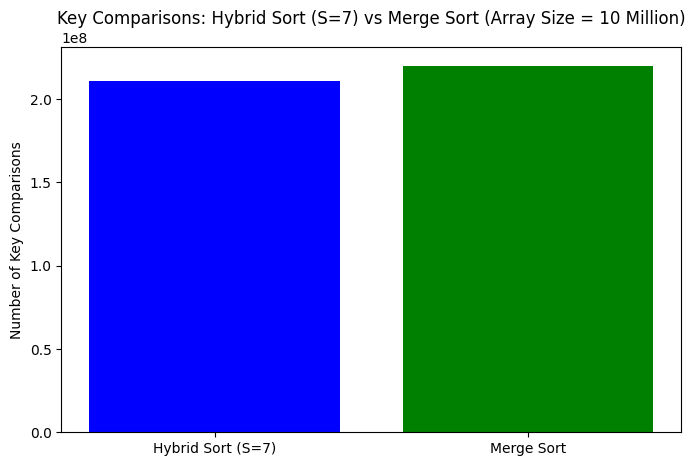

In [ ]:
import matplotlib.pyplot as plt
import random

# Function to perform normal merge sort and track key comparisons
def merge_sort(arr, left, right):
    global key_comparisons
    if left < right:
        mid = (left + right) // 2
        merge_sort(arr, left, mid)
        merge_sort(arr, mid + 1, right)
        merge(arr, left, mid, right)

# Function to reset the global comparison counter and call the sort function
def sort_and_measure(array, sorting_function, S=None):
    global key_comparisons
    key_comparisons = 0  # Reset comparisons count
    arr_copy = array.copy()  # Work with a copy to keep the original data intact
    if S is not None:
        sorting_function(arr_copy, 0, len(arr_copy) - 1, S)  # For hybrid sort calling earlier function
    else:
        sorting_function(arr_copy, 0, len(arr_copy) - 1)  # For merge sort
    return key_comparisons

# Fetch the 10 million elements array
array_10mil = arrays['10mil']

# Measure key comparisons for hybrid sort with S=7
key_comparisons_hybrid = sort_and_measure(array_10mil, hybrid_sort, S=7)

# Measure key comparisons for normal merge sort
key_comparisons_merge = sort_and_measure(array_10mil, merge_sort)

# Plotting the key comparisons for both algorithms
algorithms = ['Hybrid Sort (S=7)', 'Merge Sort']
key_comparisons = [key_comparisons_hybrid, key_comparisons_merge]

plt.figure(figsize=(8, 5))
plt.bar(algorithms, key_comparisons, color=['blue', 'green'])
plt.ylabel('Number of Key Comparisons')
plt.title('Key Comparisons: Hybrid Sort (S=7) vs Merge Sort (Array Size = 10 Million)')
plt.show()
